In [1]:
import numpy as np
import math
import time as tm
import matplotlib.pyplot as plt

# Problem 1

How do computing environments evaluate mathematical functions like sin(x)?  How can we generate efficient implementations of our own special functions or write even faster (but less accurate) versions of standard functions?

- A computer uses the CORDIC algorithm for $\sin{x}$. This is discussed at [this website](https://www.homeschoolmath.net/teaching/sine_calculator.php#:~:text=A%20calculator%20or%20computer%20program,sine%20of%20a%20given%20angle.&text=For%20example%2C%20to%20find%20out,and%20then%20multiplying%20by%20%CF%80).
- We have to be aware of different approximation schemes and be able to implement them to an acceptable amount of error.

## Part A
In your computing environment, write a routine that evaluates the Taylor approximation of sin(x) to N terms.  Test its accuracy (root-mean-square error) and speed for a random distribution of 10^6 points between zero and 2𝜋  for various N.

In [2]:
def taylorSine(x,N):
    
    series = 0;
    
    for i in range(0,N):
        series = series + (-1)**i * x**(2*i + 1)/math.factorial(2*i + 1)
        
    return series

def testTaylorSine(values,N):

    startTime = tm.time()
    
    error = [];

    for x in values:
        estimate = taylorSine(x,N)
        actual = np.sin(x)
        error = np.append(error,estimate - actual)
        
    rmsError = np.sqrt(np.square(error).mean())
    
    endTime = tm.time()
    
    runTime = endTime - startTime
    
    return rmsError, runTime


N =  1 : RMS Error =  4.033910568137746 	 Time =  0.034883975982666016

N =  2 : RMS Error =  12.834653259906135 	 Time =  0.026121139526367188

N =  3 : RMS Error =  13.766641059100557 	 Time =  0.04313778877258301

N =  4 : RMS Error =  7.76252076250758 	 Time =  0.034436702728271484

N =  5 : RMS Error =  2.753744426044895 	 Time =  0.041049957275390625

N =  6 : RMS Error =  0.677334775539324 	 Time =  0.03880786895751953

N =  7 : RMS Error =  0.12286097641567295 	 Time =  0.04967808723449707

N =  8 : RMS Error =  0.01715595723675291 	 Time =  0.0652151107788086

N =  9 : RMS Error =  0.001903883853499383 	 Time =  0.04049420356750488


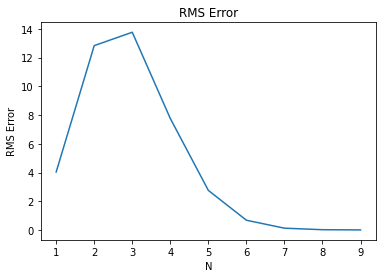

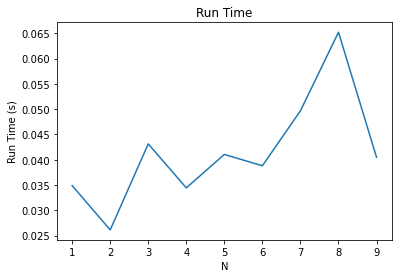

In [3]:
# Get some random numbers
numSamples = 1000 # 1e6 was taking a long time to run
randomVals = np.random.rand(numSamples) * 2*np.pi

N = range(1,10)
rmsError = np.zeros(len(N))
time = np.zeros(len(N))
for i in range(0,len(N)):
    rmsError[i],time[i] = testTaylorSine(randomVals,N[i])
    print("\nN = ",N[i],": RMS Error = ",rmsError[i],"\t Time = ",time[i])

plt.figure()
plt.plot(N,rmsError)
plt.title("RMS Error")
plt.xlabel("N")
plt.ylabel("RMS Error")

plt.figure()
plt.plot(N,time)
plt.title("Run Time")
plt.xlabel("N")
plt.ylabel("Run Time (s)");

## Part B
Store the values of sin(x) at equally-spaced points $x_n = n \Delta$.  Write a routine that linearly interpolates between these evaluated points.  Test its accuracy (root-mean-square error) and speed for a random distribution of 10^6 points between zero and 2𝜋  for various N. 

In [4]:
def linInterp(x,y,points):
    
    # Sorting the data points
    sortedPoints = np.sort(points)
    
    # Initializing interpolated result array
    result = [];
    
    # Go over each range between points
    for i in range(0,len(x)-1):
        m = (y[i+1] - y[i])/(x[i+1] - x[i])
        b = y[i] - m*x[i]
        
        for j in range(0,len(points)):
            if sortedPoints[j] >= x[i] and sortedPoints[j] <= x[i+1]:
                result = np.append(result, m*sortedPoints[j] + b)
    
    return result, sortedPoints

def testInterpolation(numTruePoints,numInterpolatedPoints):  
    
    # Getting the true points
    x = np.linspace(0,2*np.pi,numTruePoints)
    trueValues = np.sin(x)
    
    # Performing the interpolation
    points = np.random.rand(numInterpolatedPoints)*2*np.pi
    
    startTime = tm.time()
    interpolatedVals, sortedPoints = linInterp(x,trueValues,points)
    endTime = tm.time()
    
    # Getting actual values
    actualVals = np.sin(sortedPoints)
    
    # Getting rms error
    error = interpolatedVals - actualVals
    rmsError = np.sqrt(np.square(error).mean())
    
    runTime = endTime - startTime
    
    return rmsError,runTime

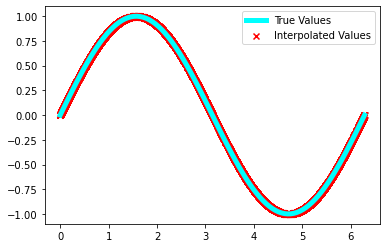

In [5]:
#--- Testing the interpolation function ---#

# Getting the true values for a certain number of points
numRealPoints = 100
x = np.linspace(0,2*np.pi,numRealPoints)
trueValues = np.sin(x)

# Created random points for interpolation
numInterpolatedPoints = 10000
points = np.random.rand(numInterpolatedPoints)*2*np.pi

# Performing the interpolation
interpolatedVals, sortedPoints = linInterp(x,trueValues,points)

# Plotting the results
plt.figure()
plt.plot(x,trueValues,linewidth = 5,color = "aqua")
plt.scatter(sortedPoints,interpolatedVals,marker="x",color = "red");
plt.legend(['True Values','Interpolated Values'])


N =  10 : RMS Error =  0.031182094988659176 	 Time =  0.30065321922302246

N =  20 : RMS Error =  0.006995714958967351 	 Time =  0.3475179672241211

N =  30 : RMS Error =  0.003028193598189809 	 Time =  0.47994303703308105

N =  40 : RMS Error =  0.0016835080454604152 	 Time =  0.4859499931335449

N =  50 : RMS Error =  0.0010533837658923755 	 Time =  0.6766908168792725

N =  60 : RMS Error =  0.0007330562470345992 	 Time =  0.8861911296844482

N =  70 : RMS Error =  0.0005333361158386935 	 Time =  0.7359941005706787

N =  80 : RMS Error =  0.0004071738737931004 	 Time =  0.8737640380859375

N =  90 : RMS Error =  0.00032026598846681504 	 Time =  0.9164559841156006

N =  100 : RMS Error =  0.000259867973428463 	 Time =  1.020374059677124


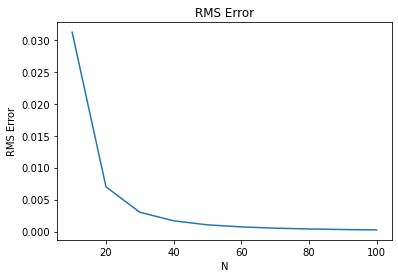

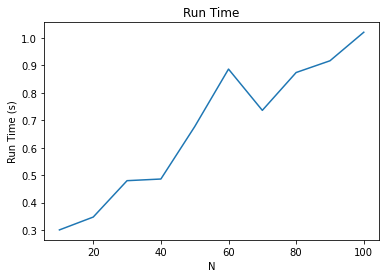

In [6]:
#--- Analyzing the results ---#

# Initializing and defining important values
N = [10,20,30,40,50,60,70,80,90,100]
rmsError = np.zeros(len(N))
time = np.zeros(len(N))
numInterpolatedPoints = 10000 # 1e6 was taking a long time to run

# Doing the calculations
for i in range(0,len(N)):
    rmsError[i],time[i] = testInterpolation(N[i],numInterpolatedPoints)
    print("\nN = ",N[i],": RMS Error = ",rmsError[i],"\t Time = ",time[i])

plt.figure()
plt.plot(N,rmsError)
plt.title("RMS Error")
plt.xlabel("N")
plt.ylabel("RMS Error")

plt.figure()
plt.plot(N,time)
plt.title("Run Time")
plt.xlabel("N")
plt.ylabel("Run Time (s)");

# Problem 2

In [7]:
def f(x):
    return np.exp(-np.cos(x))

def g(x):
    
    result = np.zeros(len(x));
    
    for i in range(0,len(x)):
        if x[i] >= -1 and x[i] <= 1:
            result[i] = f(x[i])
            
    return result

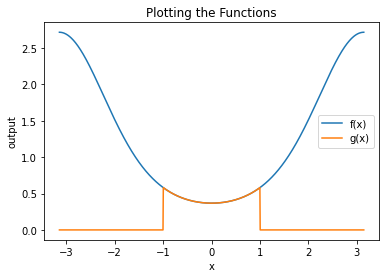

In [8]:
# Making sure the functions are being calculated correctly
x = np.linspace(-np.pi,np.pi,1000)

plt.figure()
plt.plot(x,f(x))
plt.plot(x,g(x))
plt.legend(["f(x)","g(x)"])
plt.title("Plotting the Functions")
plt.xlabel("x")
plt.ylabel("output");

## Part A
Here I use the NumPy trapz() function. This function does the simple trapezoid rule. After looking at the source code I don't immediately see anything too fancy beyond just the simple trapezoid rule.

In [9]:
# Correct values
I_1 = 7.9549265210128452745132196653294;
I_2 = 0.87070265620795901020832433774759;
I_3 = I_2;

# Evaluation grids
x_1 = np.linspace(-np.pi,np.pi,1000)
x_2 = np.linspace(-1.0,1.0,1000)
x_3 = np.linspace(-np.pi,np.pi,1000)

# Using NumPy's trapz() function
I_1_trapz = np.trapz(f(x_1),x_1)
print("I_1 Difference: ",I_1 - I_1_trapz)

I_2_trapz = np.trapz(f(x_2),x_2)
print("I_2 Difference: ",I_2 - I_2_trapz)

I_3_trapz = np.trapz(g(x_3),x_3)
print("I_3 Difference: ",I_2 - I_2_trapz)

I_1 Difference:  1.7763568394002505e-15
I_2 Difference:  -3.2746626121848976e-07
I_3 Difference:  -3.2746626121848976e-07


## Part B

In [10]:
def my_trapz(y,x):
    
    deltaX = x[1] - x[0]
    
    # Doesn't converge quickly
    # I = deltaX/2 * (y[0] + 2*np.sum(y[1:-2]) + y[-1])
    
    # This one does converge quickly
    I = deltaX*(np.sum(y) - (y[0]+y[-1])/2)
    
    return I

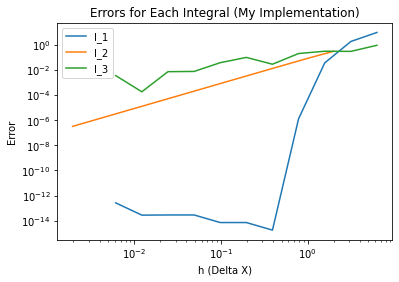

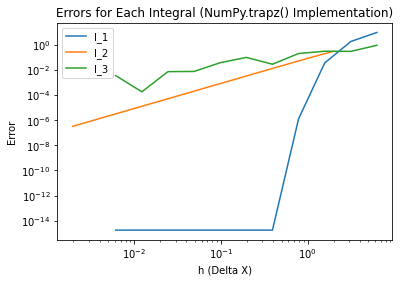

In [11]:
# Comparing for different values of N in each domain
error_1_my_trapz = [];
error_2_my_trapz = [];
error_3_my_trapz = [];
error_1_trapz = [];
error_2_trapz = [];
error_3_trapz = [];
h_1 = [];
h_2 = [];
h_3 = [];

N = [1,2,4,8,16,32,64,128,256,512,1024];

for i in range(0,len(N)):
    
    # Evaluation grids
    x_1 = np.linspace(-np.pi,np.pi,N[i]+1)
    x_2 = np.linspace(-1.0,1.0,N[i]+1)
    x_3 = np.linspace(-np.pi,np.pi,N[i]+1)
    
    # Step sizes between points
    h_1 = np.append(h_1, x_1[1] - x_1[0])
    h_2 = np.append(h_2, x_2[1] - x_2[0])
    h_3 = np.append(h_3, x_3[1] - x_3[0])
    
    error_1_my_trapz = np.append(error_1_my_trapz, np.abs(I_1 - my_trapz(f(x_1),x_1)))
    error_2_my_trapz = np.append(error_2_my_trapz, np.abs(I_2 - my_trapz(f(x_2),x_2)))
    error_3_my_trapz = np.append(error_3_my_trapz, np.abs(I_3 - my_trapz(g(x_3),x_3)))
    
    error_1_trapz = np.append(error_1_trapz, np.abs(I_1 - np.trapz(f(x_1),x_1)))
    error_2_trapz = np.append(error_2_trapz, np.abs(I_2 - np.trapz(f(x_2),x_2)))
    error_3_trapz = np.append(error_3_trapz, np.abs(I_3 - np.trapz(g(x_3),x_3)))
    
plt.figure()
plt.loglog(h_1,error_1_my_trapz, label = "I_1")
plt.loglog(h_2,error_2_my_trapz, label = "I_2")
plt.loglog(h_3,error_3_my_trapz, label = "I_3")
plt.legend()
plt.title("Errors for Each Integral (My Implementation)")
plt.xlabel("h (Delta X)")
plt.ylabel("Error");

plt.figure()
plt.loglog(h_1,error_1_trapz, label = "I_1")
plt.loglog(h_2,error_2_trapz, label = "I_2")
plt.loglog(h_3,error_3_trapz, label = "I_3")
plt.legend()
plt.title("Errors for Each Integral (NumPy.trapz() Implementation)")
plt.xlabel("h (Delta X)")
plt.ylabel("Error");

- Estimate the convergence rate for each integral and compare with the analytic formula.
    - Here is the formula from the textbook
    
$$\int_{x_0}^{x_1} f(x) dx = h \left [ \frac{1}{2}f_0 + \frac{1}{2}f_1 \right] + O(h^3 f'')$$


    (I'm not sure how to calculate the convergence rate or compare it to this formula.)
    
- Why does $I_1$ converge so quickly?
    - The second derivative of the function changes between positive and negative values over the region of integration. This helps to cancel out some of the errors. The under-estimates and the over-estimates effectively cancel each other out.
- Why does $I_3$ converge so much slower than $I_2$
    - Using equally-spaced points between $-\pi$ and $\pi$, we are not going to have a point directly on the sudden changes at $\pm 1.0$. This means that a two trapezoids are going to be making large steep jumps (one trapezoid at each of $\pm 1.0$). This results in a lot of error.

# Problem 3

## Part A

Let's say we use periodic functions as our basis set: $\{ 1, \cos{x}, \sin{x}, \cos{2x}, \sin{2x},...,\cos{nx}, \sin{nx} \}$

This gives us a total of $2n + 1$ basis functions. We can choose either sine or cosine as our highest-order basis function. Let's use sine:

$$P_N(x) = \sin{nx}$$

$$P_{N-1}(x) = \cos{nx}$$

Where $N = 2n$, which is the number of abscissas (the number of roots of $P_N(x)$, which is the number of weights that we will be solving for).

$\sin{nx}$ has equally-spaced roots at

$$x_j = h j$$

where

$$h = \frac{2\pi}{N}.$$

Now we will choose the weights as

$$w_j = \frac{\left<P_{N-1} | P_{N-1}\right>}{P_{N-1}(x_j) P_N'(x_j)}$$

$$w_j = \frac{\int_0^{2\pi} \cos^2(nx) dx}{\cos{(n x_j)} n \cos{n x_j}}$$

$$w_j = \frac{2\pi}{N\cos^2{(\pi j)}}$$

because $\cos^2{(\pi j)} = 1$ always,

$$w_j = \frac{2\pi}{N} \textrm{ (Independent of $j$)} $$

The optimal abscissas are equally spaced at

$$\boxed{x_j = h j = \frac{2 \pi j}{N}}$$

with equal weights for each term of

$$\boxed{w_j = \frac{2\pi}{N}}.$$

## Part B

Now we will use this method to solve

$$I = \int_0^{2\pi} \int_{-1}^1 \cos^2{\theta}\sin^2{\phi} d(\cos{\theta}) d\phi = \frac{2\pi}{3}$$

In [12]:
N1 = 2 # Number of sample points for inner integral
N2 = 4 # Number of sample points for outer integral

#--- Doing the inner integral using Legendre polynomial weights

# Getting the roots and weights of the N-th order legendre polynomial
roots, weights = np.polynomial.legendre.leggauss(N1)

innerIntegral = np.sum(weights * roots**2)

#--- Doing the outer integral using periodic function weights
phi = np.linspace(0,2*np.pi,N2)

outerIntegral = np.trapz(innerIntegral * np.sin(phi)**2,phi)

print('Answer:\t',outerIntegral)
print('Error:\t',np.abs(outerIntegral - 2*np.pi/3))

Answer:	 2.0943951023931953
Error:	 0.0


The convergence rate doesn't really depend on the number of points used for the portions of the integral. In fact, if $N_1 = 2$ and $N_2 = 4$, I get the exact solution, but if I use larger numbers, I start to get error on the order of $10^{-16}$, which is machine zero, but still not given exactly as zero. As seen in the paper, the inner integral just needed two weights ($m = 2$ for quadratic functions) and the outer integral needs twice as many (ie. 4). I'm honestly not fully understanding this one, but the code above appears to be performing the proper task.

# Problem 4

Calculate the sum:

$$s_n = \sum_{j=0}^n \frac{(-1)^j}{2j+1}$$

In [13]:
def s(n):
    value = 0;
    for j in range(0,n):
        value = value + (-1)**j / (2*j + 1)
    return value

How many terms do you need to get the convergence to be within 10$^{-7}$?

In [14]:
def test_sum(func,tol):
    exact = np.pi/4;
    answer = 1000; # Dummy answer for now
    n = 0;
    while abs(answer - exact) > tol:
        answer = func(n)
        n = n+1
        #print("n = ",n,"\t s = ",answer-exact)
    return n

In [15]:
print("10E-2:",test_sum(s,10**-2),"\t Iterations")
print("10E-3:",test_sum(s,10**-3),"\t Iterations")
print("10E-4:",test_sum(s,10**-4),"\t Iterations")

10E-2: 26 	 Iterations
10E-3: 251 	 Iterations
10E-4: 2501 	 Iterations


My computer was taking a long time to iterate. However, based on this pattern, we can predict that:

- 10E-5: ~25,000 Iterations
- 10E-6: ~250,000 Iterations
- 10E-7: ~2,500,000 Iterations

This means that convergence to within $10^{-7}$ requires about $2.5 \times 10^6$ terms.

Now use Aitken's $\Delta^2$ process:

$$s_n' = s_n - \frac{(s_{n+1} - s_n)^2}{s_{n+2} - 2s_{n+1} + s_n}$$

In [16]:
def s_aitken(n):
    value = 0;
    for j in range(0,n):
        value = s(n)
        
    value = value - (s(n+1) - s(n))**2 / (s(n+2) - 2*s(n+1) + s(n))
        
    return value

In [17]:
print("10E-2:",test_sum(s_aitken,10**-2),"\t terms")
print("10E-3:",test_sum(s_aitken,10**-3),"\t terms")
print("10E-4:",test_sum(s_aitken,10**-4),"\t terms")
print("10E-5:",test_sum(s_aitken,10**-5),"\t terms")
print("10E-6:",test_sum(s_aitken,10**-6),"\t terms")
print("10E-7:",test_sum(s_aitken,10**-7),"\t terms")

10E-2: 2 	 terms
10E-3: 4 	 terms
10E-4: 9 	 terms
10E-5: 19 	 terms
10E-6: 40 	 terms
10E-7: 86 	 terms


Here we see that convergence to within $10^{-7}$ requires only 86 iterations.